# 1. 模块导入

In [1]:
import pandas as pd
from scipy.optimize import curve_fit
from scipy import log
import numpy
from numpy.lib.scimath import log as log
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 2. 文件读取

In [2]:
Company_mess = pd.read_excel(
    "./题目一_信贷数据分析.xlsx", sheet_name="Sheet1", usecols=["企业代号", "企业名称", "信誉评级", "是否违约", "信贷风险", "总税额", "进项总金额", "销项总金额",
                                                   "作废比例",  "公司规模", "供应公司比重", "销售公司比重","进项年数","销项年数","进项月数","销项月数"])
#Company_mess = Company_info[["企业名称", "信誉评级", "是否违约", "信贷风险", "总税额", "进项总金额", "销项总金额","作废比例",  "公司规模", "供应公司比重", "销售公司比重"]]
# ["企业名称", "信誉评级", "是否违约", "信贷风险", "进项总金额", "销项总金额", "总税额","进项数", "销项数", "作废数", "作废比例", "公司类别", "公司规模", "供应公司比重", "销售公司比重"]
Company_mess

,企业代号,企业名称,信誉评级,是否违约,进项总金额,销项总金额,总税额,作废比例,进项年数,销项年数,进项月数,销项月数,公司规模,供应公司比重,销售公司比重,信贷风险
0,E1,***电器销售有限公司,80,0,5.744706e+09,4.065843e+09,-2.604456e+08,0.037360,4,4,12,12,3,0.134195,0.044636,0
1,E2,***技术有限责任公司,80,0,1.557623e+08,5.908417e+08,2.872827e+07,0.040905,4,4,12,12,3,0.115317,0.135362,0
2,E3,***电子(中国)有限公司***分公司,40,0,5.202698e+07,5.701780e+08,8.873991e+07,0.020638,4,4,12,12,3,0.130753,0.005699,0
3,E4,***发展有限责任公司,40,0,2.198771e+08,1.839970e+09,2.718638e+08,0.088603,3,3,12,9,3,0.251440,0.012739,0
4,E5,***供应链管理有限公司,60,0,1.977850e+08,2.026323e+08,1.111417e+06,0.045322,4,2,12,8,3,0.188580,0.032836,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,E119,***药房,20,1,2.197387e+05,3.567186e+04,-2.892597e+04,0.012048,1,2,1,2,1,0.054140,0.777778,1
119,E120,***陈列广告有限公司,20,1,1.811556e+04,1.906732e+05,4.389430e+03,0.477273,1,1,1,1,1,0.457143,0.666667,1
120,E121,***药业连锁有限公司***药店,20,1,1.073486e+06,1.014620e+05,-1.648082e+05,0.107981,0,2,0,7,2,0.220000,0.711656,1
121,E122,***商贸有限责任公司,20,1,5.067211e+04,5.892182e+04,-1.255370e+03,0.114094,1,3,1,6,1,0.468085,0.676471,1


In [3]:
Profit_infor = pd.read_excel('./数据/附件3：银行贷款年利率与客户流失率关系的统计数据.xlsx',sheet_name = 0)
Profit_infor.head()

,贷款年利率,客户流失率,Unnamed: 2,Unnamed: 3
0,NaN,信誉评级A,信誉评级B,信誉评级C
1,0.0400,0,0,0
2,0.0425,0.0945741,0.0667996,0.0687253
3,0.0465,0.135727,0.135052,0.122099
4,0.0505,0.224603,0.20658,0.181252


# 3. 绘制图形

## 3.1 函数拟合【对数函数拟合】

In [4]:
def func(x, a, b):
    y = a * log(x) + b
    return y


def polyfit(x, y, degree):
    results = {}
    #coeffs = numpy.polyfit(x, y, degree)
    popt, pcov = curve_fit(func, x, y)
    results['参数'] = popt

    # r-squared
    # or [p(z) for z in x]
    yhat = func(x, popt[0], popt[1])
    ybar = numpy.sum(y)/len(y)          # or sum(y)/len(y)
    # or sum([ (yihat - ybar)**2 for yihat in yhat])
    ssreg = numpy.sum((yhat-ybar)**2)
    sstot = numpy.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['置信度'] = ssreg / sstot

    return results


def getOut(x, y):
    return polyfit(x, y, 2)

## 3.2 绘图

In [5]:
count = 0;
def ShowPic(x,y,label):
    global count
    
    z = getOut(x,y)
    a,b = z["参数"]
    
    font = FontProperties(fname=r"c:\windows\fonts\STKAITI.TTF", size=10)
    fig = plt.figure(num=count ,figsize=(18,9))  # 设置图大小
    plt.title('信誉评级与顾客流失率【f = %.3f log(x)+ %.3f】'%(a,b), fontproperties=font)
    print(a,b)
    plt.xlabel('利率', fontproperties=font)
    plt.ylabel('流失率', fontproperties=font)
    plt.scatter(x,y, c='red', label=label)
    
    x = numpy.linspace(min(x)-0.01, max(x)+0.01, 1000)
    y = [a * log(i) + b for i in x]
    plt.plot(x, y, color="black", label="fit", linewidth=2)

    plt.legend(loc='best')
    plt.show()
    
    count +=1

0.6690026022949184 2.238599821505864


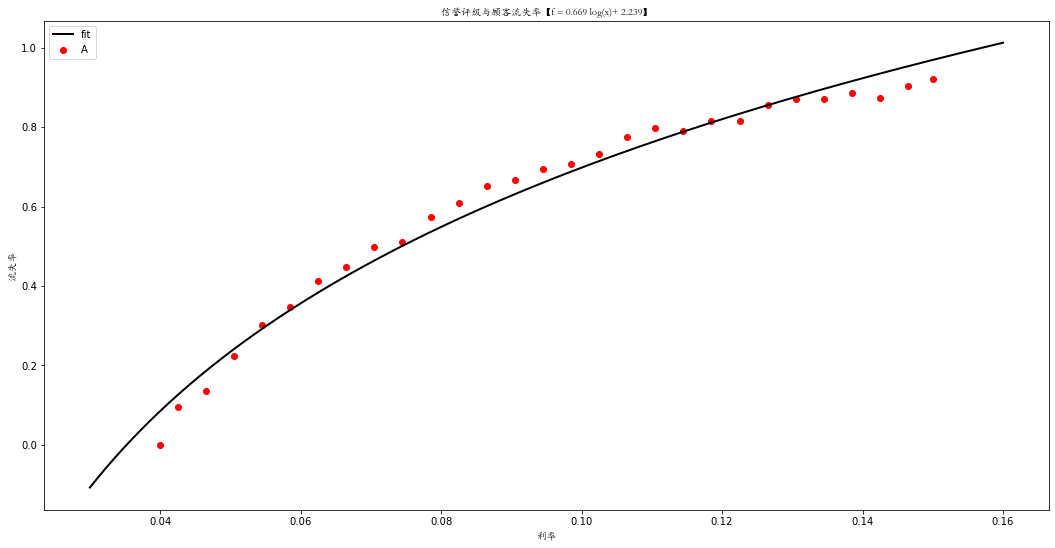

In [6]:
ShowPic(Profit_infor.iloc[1:, 0].values,
         Profit_infor.iloc[1:, 1].values,"A")

0.65057086531514 2.1576334615275665


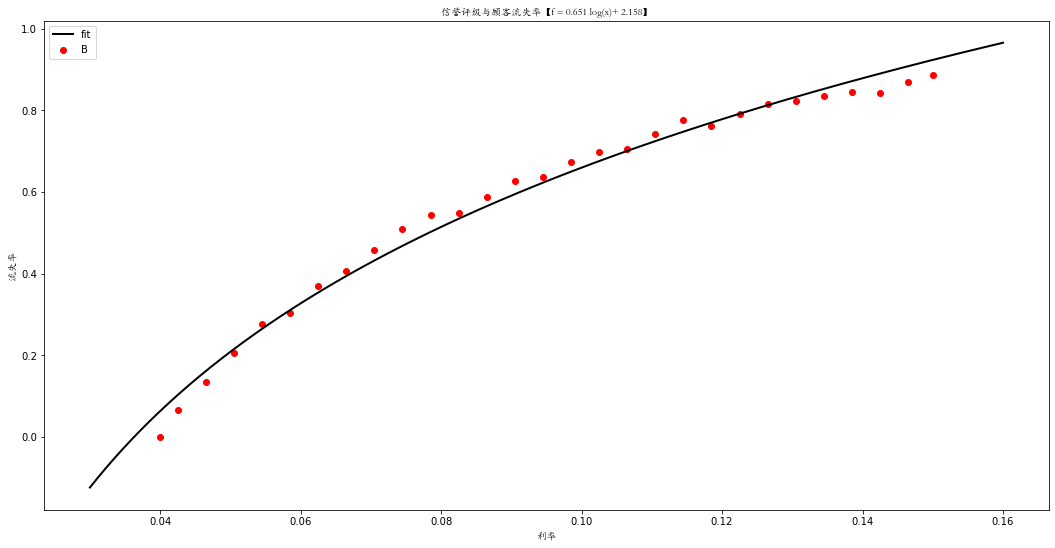

In [7]:
ShowPic(Profit_infor.iloc[1:, 0].values,
         Profit_infor.iloc[1:, 2].values,"B")

0.6585628094364926 2.1679964572989165


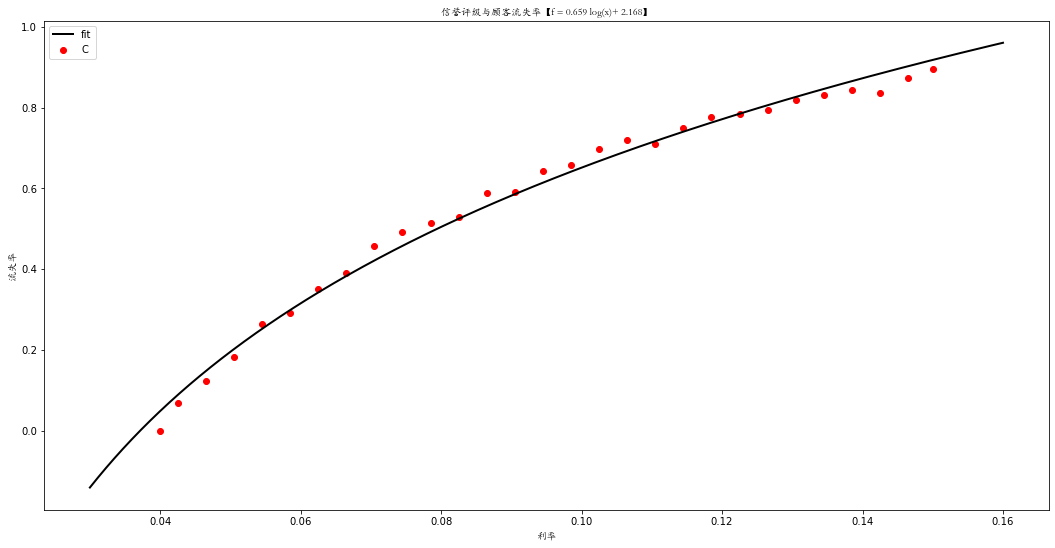

In [8]:
ShowPic(Profit_infor.iloc[1:, 0].values,
         Profit_infor.iloc[1:, 3].values,"C")

0.6593787589707425 2.188076580002009


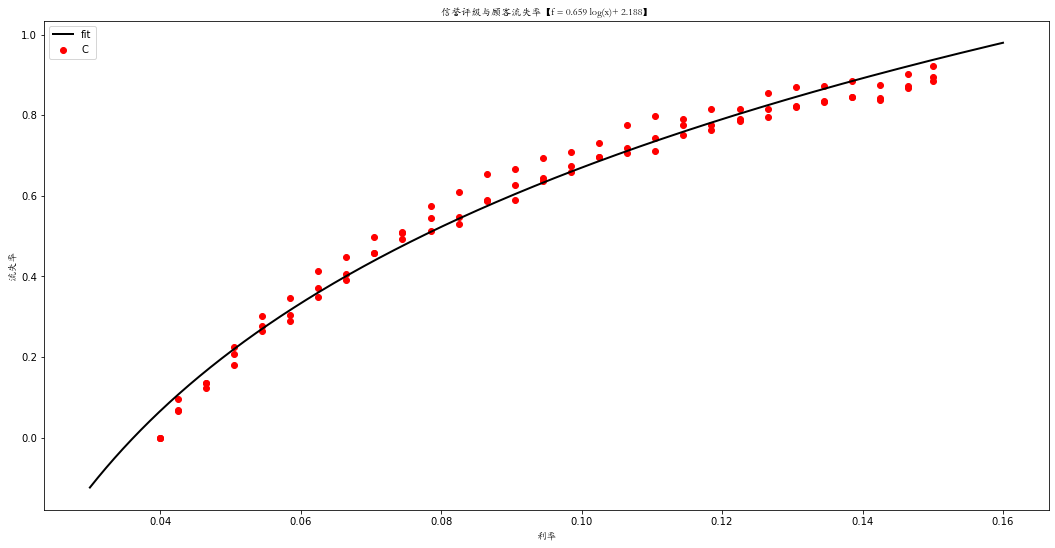

In [9]:
x = Profit_infor.iloc[1:, 0].values.tolist()
x *= 3
y = Profit_infor.iloc[1:, 1].values.tolist()
y.extend(Profit_infor.iloc[1:, 2].values.tolist())
y.extend(Profit_infor.iloc[1:, 3].values.tolist())

ShowPic(x,y,"C")

# 4. 供求关系映射

In [10]:
def GQGX(x,min,max):
    return (x-min)*0.11/(max-min)+0.04

In [11]:
min_in = Company_mess["供应公司比重"].min()
max_in = Company_mess["供应公司比重"].max()
min_out = Company_mess["销售公司比重"].min()
max_out = Company_mess["销售公司比重"].max()


Company_mess['供应公司比重'] = Company_mess['供应公司比重'].apply(
    lambda x: GQGX(x, min_in, max_in))
Company_mess['销售公司比重'] = Company_mess['销售公司比重'].apply(
    lambda x: GQGX(x, min_out, max_out))

# 重命名列，列名为索引类型，为不可变类型，故需先转为可变的索引再操作
columns = Company_mess.columns
columns = list(columns)
columns[columns.index('供应公司比重')] = '利率1'
columns[columns.index('销售公司比重')] = '利率2'
Company_mess.columns = columns

Company_mess.to_excel("kkp.xlsx")  # 不保存行索引
Company_mess

,企业代号,企业名称,信誉评级,是否违约,进项总金额,销项总金额,总税额,作废比例,进项年数,销项年数,进项月数,销项月数,公司规模,利率1,利率2,信贷风险
0,E1,***电器销售有限公司,80,0,5.744706e+09,4.065843e+09,-2.604456e+08,0.037360,4,4,12,12,3,0.049519,0.045191,0
1,E2,***技术有限责任公司,80,0,1.557623e+08,5.908417e+08,2.872827e+07,0.040905,4,4,12,12,3,0.047328,0.055954,0
2,E3,***电子(中国)有限公司***分公司,40,0,5.202698e+07,5.701780e+08,8.873991e+07,0.020638,4,4,12,12,3,0.049120,0.040571,0
3,E4,***发展有限责任公司,40,0,2.198771e+08,1.839970e+09,2.718638e+08,0.088603,3,3,12,9,3,0.063126,0.041406,0
4,E5,***供应链管理有限公司,60,0,1.977850e+08,2.026323e+08,1.111417e+06,0.045322,4,2,12,8,3,0.055831,0.043791,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,E119,***药房,20,1,2.197387e+05,3.567186e+04,-2.892597e+04,0.012048,1,2,1,2,1,0.040228,0.132169,1
119,E120,***陈列广告有限公司,20,1,1.811556e+04,1.906732e+05,4.389430e+03,0.477273,1,1,1,1,1,0.086999,0.118987,1
120,E121,***药业连锁有限公司***药店,20,1,1.073486e+06,1.014620e+05,-1.648082e+05,0.107981,0,2,0,7,2,0.059477,0.124324,1
121,E122,***商贸有限责任公司,20,1,5.067211e+04,5.892182e+04,-1.255370e+03,0.114094,1,3,1,6,1,0.088269,0.120150,1


# 5. 信誉等级回归

In [12]:
Use_Company = Company_mess[(Company_mess["信誉评级"]>20)&(Company_mess["是否违约"]==0)&(Company_mess["信贷风险"]==0)&(Company_mess["总税额"]>0)&(Company_mess["进项年数"]>0)&(Company_mess["销项年数"]>0)]
Use_Company = Use_Company[["企业名称","信誉评级","进项总金额","销项总金额","总税额","作废比例","公司规模","利率1","利率2","进项年数","销项年数","进项月数","销项月数"]]
Use_Company

,企业名称,信誉评级,进项总金额,销项总金额,总税额,作废比例,公司规模,利率1,利率2,进项年数,销项年数,进项月数,销项月数
1,***技术有限责任公司,80,1.557623e+08,5.908417e+08,2.872827e+07,0.040905,3,0.047328,0.055954,4,4,12,12
2,***电子(中国)有限公司***分公司,40,5.202698e+07,5.701780e+08,8.873991e+07,0.020638,3,0.049120,0.040571,4,4,12,12
3,***发展有限责任公司,40,2.198771e+08,1.839970e+09,2.718638e+08,0.088603,3,0.063126,0.041406,3,3,12,9
4,***供应链管理有限公司,60,1.977850e+08,2.026323e+08,1.111417e+06,0.045322,3,0.055831,0.043791,4,2,12,8
5,***装饰设计工程有限公司,80,3.022827e+08,3.664393e+08,1.056228e+07,0.056451,3,0.050204,0.058347,4,4,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,***文化传媒有限责任公司,40,7.311249e+05,3.249122e+06,1.681836e+05,0.242236,2,0.064033,0.070982,1,3,2,12
90,***科技实业有限公司,80,1.300367e+06,2.335401e+06,1.655857e+05,0.051546,2,0.058123,0.110306,3,3,5,5
92,***电脑设计事务所,60,2.858032e+05,1.476055e+06,2.717006e+04,0.034384,2,0.070212,0.063454,2,2,4,5
97,***文化传播有限公司,60,1.993190e+05,1.403242e+06,3.190526e+04,0.114754,2,0.096615,0.062195,1,3,1,8


In [13]:
Use_Company.sort_values(['信誉评级','总税额','公司规模','作废比例'],ascending=[0,0,0,1],inplace=True)
Use_Company

,企业名称,信誉评级,进项总金额,销项总金额,总税额,作废比例,公司规模,利率1,利率2,进项年数,销项年数,进项月数,销项月数
6,***家电有限公司***分公司,80,5.972033e+07,5.129506e+08,79508456.90,0.027618,3,0.048375,0.057782,4,4,12,12
8,***生活用品服务有限公司***分公司,80,2.453562e+07,3.195921e+08,48022003.97,0.024099,3,0.054342,0.042428,4,4,12,12
1,***技术有限责任公司,80,1.557623e+08,5.908417e+08,28728268.10,0.040905,3,0.047328,0.055954,4,4,12,12
12,***汽车贸易有限公司,80,9.202848e+07,2.124548e+08,19923225.66,0.070328,3,0.040266,0.095345,4,4,12,12
7,***科学研究院有限公司,80,1.624131e+08,3.588888e+08,13899413.82,0.060559,3,0.047790,0.077918,4,4,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,***家居材料***有限公司,40,2.454074e+07,2.625726e+07,261611.76,0.053416,3,0.050265,0.049479,3,4,11,12
89,***文化传媒有限责任公司,40,7.311249e+05,3.249122e+06,168183.63,0.242236,2,0.064033,0.070982,1,3,2,12
76,***机电设备有限公司,40,7.494616e+05,4.358879e+06,159524.37,0.022951,2,0.068980,0.040837,1,3,1,4
74,***酒店管理有限公司,40,2.556438e+06,6.451154e+06,28560.02,0.070332,2,0.045378,0.150000,3,4,10,12


In [14]:
def funA(x):
    return 0.6690026022949184*log(x) + 2.238599821505864


def funB(x):
    return 0.65057086531514*log(x) + 2.1576334615275665


def funC(x):
    return 0.6593787589707425*log(x) + 2.188076580002009


def quit(x, pla):
    if(x["信誉评级"] == 80):
        return funA(x["利率"+str(pla)])
    elif(x["信誉评级"] == 60):
        return funB(x["利率"+str(pla)])
    else:
        return funC(x["利率"+str(pla)])


Use_Company['取消合作1'] =Use_Company.apply(lambda x: quit(x, 1), axis=1)
Use_Company['取消合作2'] = Use_Company.apply(lambda x: quit(x, 2), axis=1)
Use_Company

,企业名称,信誉评级,进项总金额,销项总金额,总税额,作废比例,公司规模,利率1,利率2,进项年数,销项年数,进项月数,销项月数,取消合作1,取消合作2
6,***家电有限公司***分公司,80,5.972033e+07,5.129506e+08,79508456.90,0.027618,3,0.048375,0.057782,4,4,12,12,0.212343,0.331225
8,***生活用品服务有限公司***分公司,80,2.453562e+07,3.195921e+08,48022003.97,0.024099,3,0.054342,0.042428,4,4,12,12,0.290162,0.124594
1,***技术有限责任公司,80,1.557623e+08,5.908417e+08,28728268.10,0.040905,3,0.047328,0.055954,4,4,12,12,0.197706,0.309716
12,***汽车贸易有限公司,80,9.202848e+07,2.124548e+08,19923225.66,0.070328,3,0.040266,0.095345,4,4,12,12,0.089606,0.666277
7,***科学研究院有限公司,80,1.624131e+08,3.588888e+08,13899413.82,0.060559,3,0.047790,0.077918,4,4,12,12,0.204209,0.531236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,***家居材料***有限公司,40,2.454074e+07,2.625726e+07,261611.76,0.053416,3,0.050265,0.049479,3,4,11,12,0.216242,0.205852
89,***文化传媒有限责任公司,40,7.311249e+05,3.249122e+06,168183.63,0.242236,2,0.064033,0.070982,1,3,2,12,0.375872,0.443803
76,***机电设备有限公司,40,7.494616e+05,4.358879e+06,159524.37,0.022951,2,0.068980,0.040837,1,3,1,4,0.424942,0.079267
74,***酒店管理有限公司,40,2.556438e+06,6.451154e+06,28560.02,0.070332,2,0.045378,0.150000,3,4,10,12,0.148796,0.937156


In [15]:
def getEarn(x, pla):
    return x["总税额"]*(1-x["取消合作"+str(pla)])


Use_Company['期望1'] = Use_Company.apply(lambda x: getEarn(x, 1), axis=1)
Use_Company['期望2'] = Use_Company.apply(lambda x: getEarn(x, 2), axis=1)
Use_Company

,企业名称,信誉评级,进项总金额,销项总金额,总税额,作废比例,公司规模,利率1,利率2,进项年数,销项年数,进项月数,销项月数,取消合作1,取消合作2,期望1,期望2
6,***家电有限公司***分公司,80,5.972033e+07,5.129506e+08,79508456.90,0.027618,3,0.048375,0.057782,4,4,12,12,0.212343,0.331225,6.262541e+07,5.317330e+07
8,***生活用品服务有限公司***分公司,80,2.453562e+07,3.195921e+08,48022003.97,0.024099,3,0.054342,0.042428,4,4,12,12,0.290162,0.124594,3.408784e+07,4.203875e+07
1,***技术有限责任公司,80,1.557623e+08,5.908417e+08,28728268.10,0.040905,3,0.047328,0.055954,4,4,12,12,0.197706,0.309716,2.304850e+07,1.983067e+07
12,***汽车贸易有限公司,80,9.202848e+07,2.124548e+08,19923225.66,0.070328,3,0.040266,0.095345,4,4,12,12,0.089606,0.666277,1.813799e+07,6.648843e+06
7,***科学研究院有限公司,80,1.624131e+08,3.588888e+08,13899413.82,0.060559,3,0.047790,0.077918,4,4,12,12,0.204209,0.531236,1.106103e+07,6.515540e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,***家居材料***有限公司,40,2.454074e+07,2.625726e+07,261611.76,0.053416,3,0.050265,0.049479,3,4,11,12,0.216242,0.205852,2.050402e+05,2.077586e+05
89,***文化传媒有限责任公司,40,7.311249e+05,3.249122e+06,168183.63,0.242236,2,0.064033,0.070982,1,3,2,12,0.375872,0.443803,1.049682e+05,9.354331e+04
76,***机电设备有限公司,40,7.494616e+05,4.358879e+06,159524.37,0.022951,2,0.068980,0.040837,1,3,1,4,0.424942,0.079267,9.173570e+04,1.468794e+05
74,***酒店管理有限公司,40,2.556438e+06,6.451154e+06,28560.02,0.070332,2,0.045378,0.150000,3,4,10,12,0.148796,0.937156,2.431041e+04,1.794827e+03


In [16]:
Use_Company["利率"] = Use_Company.apply(
    lambda x: x["利率1"] if x["期望1"] > x["期望2"] else x["利率2"], axis=1)
Use_Company["取消合作"] = Use_Company.apply(
    lambda x: x["取消合作1"] if x["期望1"] > x["期望2"] else x["取消合作2"], axis=1)
Use_Company.drop('利率1',axis=1,inplace=True)
Use_Company.drop('利率2',axis=1,inplace=True)
Use_Company.drop('期望1',axis=1,inplace=True)
Use_Company.drop('期望2',axis=1,inplace=True)
Use_Company.drop('取消合作1',axis=1,inplace=True)
Use_Company.drop('取消合作2',axis=1,inplace=True)
Use_Company

,企业名称,信誉评级,进项总金额,销项总金额,总税额,作废比例,公司规模,进项年数,销项年数,进项月数,销项月数,利率,取消合作
6,***家电有限公司***分公司,80,5.972033e+07,5.129506e+08,79508456.90,0.027618,3,4,4,12,12,0.048375,0.212343
8,***生活用品服务有限公司***分公司,80,2.453562e+07,3.195921e+08,48022003.97,0.024099,3,4,4,12,12,0.042428,0.124594
1,***技术有限责任公司,80,1.557623e+08,5.908417e+08,28728268.10,0.040905,3,4,4,12,12,0.047328,0.197706
12,***汽车贸易有限公司,80,9.202848e+07,2.124548e+08,19923225.66,0.070328,3,4,4,12,12,0.040266,0.089606
7,***科学研究院有限公司,80,1.624131e+08,3.588888e+08,13899413.82,0.060559,3,4,4,12,12,0.047790,0.204209
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,***家居材料***有限公司,40,2.454074e+07,2.625726e+07,261611.76,0.053416,3,3,4,11,12,0.049479,0.205852
89,***文化传媒有限责任公司,40,7.311249e+05,3.249122e+06,168183.63,0.242236,2,1,3,2,12,0.064033,0.375872
76,***机电设备有限公司,40,7.494616e+05,4.358879e+06,159524.37,0.022951,2,1,3,1,4,0.040837,0.079267
74,***酒店管理有限公司,40,2.556438e+06,6.451154e+06,28560.02,0.070332,2,3,4,10,12,0.045378,0.148796


In [17]:
Use_Company["年均进项"]  = Use_Company["进项总金额"]/ Use_Company["进项年数"]
Use_Company["年均销项"]  = Use_Company["销项总金额"]/ Use_Company["销项年数"]
Use_Company["月均进项"]  = Use_Company["年均进项"]/ Use_Company["销项月数"]
Use_Company["月均销项"]  = Use_Company["年均销项"]/ Use_Company["销项月数"]
Use_Company["月均税额"]  = Use_Company["年均销项"]/ Use_Company["进项年数"]
Use_Company.drop('进项总金额',axis=1,inplace=True)
Use_Company.drop('销项总金额',axis=1,inplace=True)
Use_Company.drop('进项年数',axis=1,inplace=True)
Use_Company.drop('销项年数',axis=1,inplace=True)
Use_Company.drop('进项月数',axis=1,inplace=True)
Use_Company.drop('销项月数',axis=1,inplace=True)
Use_Company

,企业名称,信誉评级,总税额,作废比例,公司规模,利率,取消合作,年均进项,年均销项,月均进项,月均销项,月均税额
6,***家电有限公司***分公司,80,79508456.90,0.027618,3,0.048375,0.212343,1.493008e+07,1.282377e+08,1.244174e+06,1.068647e+07,3.205941e+07
8,***生活用品服务有限公司***分公司,80,48022003.97,0.024099,3,0.042428,0.124594,6.133904e+06,7.989803e+07,5.111587e+05,6.658169e+06,1.997451e+07
1,***技术有限责任公司,80,28728268.10,0.040905,3,0.047328,0.197706,3.894058e+07,1.477104e+08,3.245048e+06,1.230920e+07,3.692761e+07
12,***汽车贸易有限公司,80,19923225.66,0.070328,3,0.040266,0.089606,2.300712e+07,5.311369e+07,1.917260e+06,4.426141e+06,1.327842e+07
7,***科学研究院有限公司,80,13899413.82,0.060559,3,0.047790,0.204209,4.060326e+07,8.972221e+07,3.383605e+06,7.476851e+06,2.243055e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
55,***家居材料***有限公司,40,261611.76,0.053416,3,0.049479,0.205852,8.180246e+06,6.564315e+06,6.816871e+05,5.470263e+05,2.188105e+06
89,***文化传媒有限责任公司,40,168183.63,0.242236,2,0.064033,0.375872,7.311249e+05,1.083041e+06,6.092708e+04,9.025339e+04,1.083041e+06
76,***机电设备有限公司,40,159524.37,0.022951,2,0.040837,0.079267,7.494616e+05,1.452960e+06,1.873654e+05,3.632399e+05,1.452960e+06
74,***酒店管理有限公司,40,28560.02,0.070332,2,0.045378,0.148796,8.521460e+05,1.612789e+06,7.101216e+04,1.343991e+05,5.375962e+05


In [18]:
Use_Company["贷款额度"] = (Use_Company["月均进项"]*(1-Use_Company["作废比例"])*1.5//10000 + 1)*10000
Use_Company.to_excel("题目一_贷款分配.xlsx") #不保存行索引
Use_Company

,企业名称,信誉评级,总税额,作废比例,公司规模,利率,取消合作,年均进项,年均销项,月均进项,月均销项,月均税额,贷款额度
6,***家电有限公司***分公司,80,79508456.90,0.027618,3,0.048375,0.212343,1.493008e+07,1.282377e+08,1.244174e+06,1.068647e+07,3.205941e+07,1820000.0
8,***生活用品服务有限公司***分公司,80,48022003.97,0.024099,3,0.042428,0.124594,6.133904e+06,7.989803e+07,5.111587e+05,6.658169e+06,1.997451e+07,750000.0
1,***技术有限责任公司,80,28728268.10,0.040905,3,0.047328,0.197706,3.894058e+07,1.477104e+08,3.245048e+06,1.230920e+07,3.692761e+07,4670000.0
12,***汽车贸易有限公司,80,19923225.66,0.070328,3,0.040266,0.089606,2.300712e+07,5.311369e+07,1.917260e+06,4.426141e+06,1.327842e+07,2680000.0
7,***科学研究院有限公司,80,13899413.82,0.060559,3,0.047790,0.204209,4.060326e+07,8.972221e+07,3.383605e+06,7.476851e+06,2.243055e+07,4770000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,***家居材料***有限公司,40,261611.76,0.053416,3,0.049479,0.205852,8.180246e+06,6.564315e+06,6.816871e+05,5.470263e+05,2.188105e+06,970000.0
89,***文化传媒有限责任公司,40,168183.63,0.242236,2,0.064033,0.375872,7.311249e+05,1.083041e+06,6.092708e+04,9.025339e+04,1.083041e+06,70000.0
76,***机电设备有限公司,40,159524.37,0.022951,2,0.040837,0.079267,7.494616e+05,1.452960e+06,1.873654e+05,3.632399e+05,1.452960e+06,280000.0
74,***酒店管理有限公司,40,28560.02,0.070332,2,0.045378,0.148796,8.521460e+05,1.612789e+06,7.101216e+04,1.343991e+05,5.375962e+05,100000.0


重要性： [0.10273524 0.10952099 0.0218405  0.08126901 0.10510485 0.09006004
 0.11060805 0.09482876 0.10052881 0.09310247 0.09040128]
 1) 年均销项                           0.110608
 2) 作废比例                           0.109521
 3) 取消合作                           0.105105
 4) 总税额                            0.102735
 5) 月均销项                           0.100529
 6) 月均进项                           0.094829
 7) 月均税额                           0.093102
 8) 贷款额度                           0.090401
 9) 年均进项                           0.090060
10) 利率                             0.081269
11) 公司规模                           0.021841


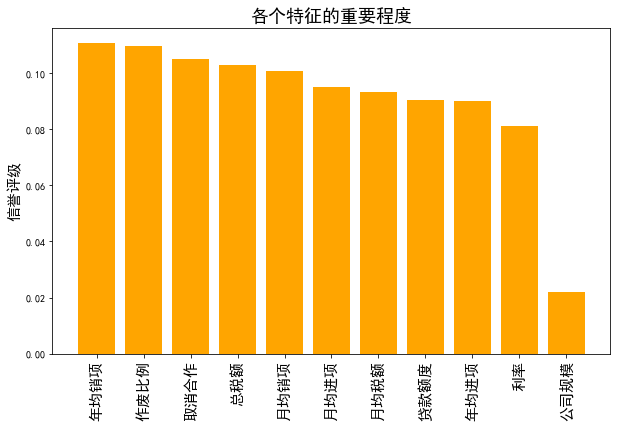

[40 60 40 40 40 60 80 40 40 60 60 60 60 60 60 40 40 60 80 60 60]
[40 60 80 60 80 60 80 80 60 80 80 80 80 40 40 80 80 60 80 80 80]
随机森林准确率 0.2857142857142857
随机森林精确率 0.36239316239316244
随机森林召回率 0.4659090909090909
F1 0.2744949494949495


In [19]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


# 下面将数据集分为训练集和测试集
x, y = Use_Company.iloc[:, 2:].values, Use_Company.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0)
feat_labels = Use_Company.columns[2:]

# n_estimators：森林中树的数量
# n_jobs  整数 可选（默认=1） 适合和预测并行运行的作业数，如果为-1，则将作业数设置为核心数
forest = ExtraTreesClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(x_train, y_train)

# 下面对训练好的随机森林，完成重要性评估
# feature_importances_  可以调取关于特征重要程度
importances = forest.feature_importances_
print("重要性：", importances)
x_columns = Use_Company.columns[2:]
indices = np.argsort(importances)[::-1]
x_columns_indices = []
for f in range(x_train.shape[1]):
    # 对于最后需要逆序排序，我认为是做了类似决策树回溯的取值，从叶子收敛
    # 到根，根部重要程度高于叶子。
    print("%2d) %-*s %f" %
          (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])

# print(x_columns_indices)
# print(x_columns.shape[0])
# print(x_columns)
# print(np.arange(x_columns.shape[0]))

# 筛选变量（选择重要性比较高的变量）
threshold = 0.15
x_selected = x_train[:, importances > threshold]

# 可视化

plt.figure(figsize=(10, 6))
plt.title("各个特征的重要程度", fontsize=18)
plt.ylabel("信誉评级", fontsize=15, rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='orange', align='center')
    plt.xticks(np.arange(x_columns.shape[0]),
               x_columns_indices, rotation=90, fontsize=15)
plt.show()


y_predict = forest.predict(x_test)
print(y_test)
print(y_predict)
print('随机森林准确率', forest.score(x_test, y_test))
print('随机森林精确率', precision_score(y_test, y_predict,  average='macro'))
print('随机森林召回率', recall_score(y_test, y_predict,  average='macro'))
print('F1', f1_score(y_test, y_predict,  average='macro'))

In [20]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Use_Company["参数"] = numpy.array([i.dot(importances) for i in Use_Company.iloc[:, 2:].values])
X = Use_Company["参数"].values.reshape(-1, 1)
y = Use_Company["信誉评级"].values
lr = LogisticRegression()

lr.fit(X, y)
lr.predict(X)
score = lr.score(X, y)
print(score)

0.2898550724637681
